In [ ]:
# Inspired by: https://www.youtube.com/watch?v=HjmIOKSp7v4&t=13s
import matplotlib.pyplot as plt
import numpy as np

In [136]:
j2l = 84
j3l = 127

In [166]:
def render(v2, v3):
    x1, y1 = [0, 200], [0, 0]  # x axis
    x2, y2 = [0, 0], [-100, 100]  # y axis
    plt.gca().invert_xaxis()
    plt.plot(x1, y1, linestyle="dashed", color="black")
    plt.plot(x2, y2, linestyle="dashed", color="black")

    # Draw leg
    voffset = np.deg2rad(90)

    v2rad = np.deg2rad(v2)
    v3rad = np.deg2rad(v3)

    l1x = np.cos(v2rad) * j2l
    l1y = np.sin(v2rad) * j2l

    l2x = np.cos(v2rad + v3rad - voffset) * j3l
    l2y = np.sin(v2rad + v3rad - voffset) * j3l

    plt.plot([0, l1x], [0, l1y], color="red", marker="o")
    plt.plot([l1x, l1x + l2x], [l1y, l2y + l2y], color="green", marker="o")

    plt.show()

In [ ]:
def calculate_angles(z, y):
    v3offset = np.deg2rad(
        7
    )  # foot is not directly under servo so zero angle do not have foot in in right place
    # when angle is zero foot is too far off
    l = np.sqrt(y**2 + z**2)
    v3 = np.arccos((j2l**2 + j3l**2 - l**2) / (2 * j2l * j3l))
    vb = np.arccos((j2l**2 + l**2 - j3l**2) / (2 * j2l * l))
    va = np.arctan2(z, y)

    v2 = vb - va
    v3 = v3 - np.deg2rad(90)  # Adjust for the servo offset
    v3 = v3 - v3offset  # Adjust for the foot offset

    v2deg = np.rad2deg(v2)
    v3deg = np.rad2deg(v3)
    print(
        f"Calculated: l={l:.2f}, v2={v2deg:.2f},v3={v3deg:.2f}, vb={np.rad2deg(vb):.2f}, va={np.rad2deg(va):.2f}"
    )
    return v2deg, v3deg

Calculated: l=128.06, v2=31.43,v3=-25.54, vb=70.09, va=38.66
Calculated angles: v2 = 31.43, v3 = -25.54


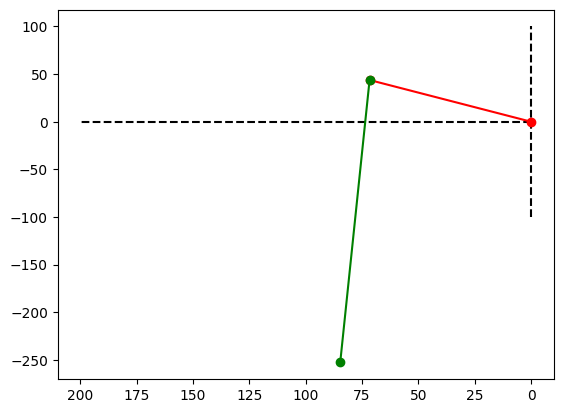

In [219]:
z = int(80)
y = int(100)

v2, v3 = calculate_angles(z, y)
print(f"Calculated angles: v2 = {v2:.2f}, v3 = {v3:.2f}")

render(v2, v3)